# Feature Importance for Predicting Unhealthy Dietary Habits Using KNN

In [100]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt



In [101]:
# Load the dataset
data = pd.read_csv('South_Texas_Obesity_Rates.csv', sep=',')

# Dropping unnecessary columns
data = data.drop(['Patient ID','Date of Birth'], axis=1)


In [102]:
# Display column/variable names
columns = list(data.columns)
print("Variables in the data are: ")
print(columns)

Variables in the data are: 
['ZIP Code', 'Sex', 'Age', 'Weight (lbs)', 'Height (inches)', 'BMI', 'Obesity', 'Ethnicity', 'Highest Education', 'Employment Status', 'Income Level', 'Health Insurance Status', 'Dietary Habits', 'Exercise Frequency', 'Health Issues', 'Systolic Bp', 'Diastolic Bp', 'Total Cholestoral', 'HDL Cholesterol', 'IDI Cholesterol', 'Fasting Glucose', 'Waist Circumference', 'Stress Level', 'Sleep Quality', 'Substance Abuse', 'Mental Health Status', 'Coping Mechanism', 'Social Support Level', 'Total Cholesterol']


In [103]:
# Convert categorical variables to dummy variables

data_with_dummies = pd.get_dummies(data, drop_first=True)
data_with_dummies.columns


Index(['ZIP Code', 'Age', 'Weight (lbs)', 'Height (inches)', 'BMI',
       'Systolic Bp', 'Diastolic Bp', 'Total Cholestoral', 'HDL Cholesterol',
       'IDI Cholesterol', 'Fasting Glucose', 'Waist Circumference',
       'Total Cholesterol', 'Sex_Male', 'Obesity_Yes', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Native American', 'Ethnicity_Other',
       'Ethnicity_White', 'Highest Education_Bachelor Degree',
       'Highest Education_Elementary', 'Highest Education_Graduate Degree',
       'Highest Education_High School Graduate',
       'Highest Education_Some College', 'Highest Education_Some High School',
       'Employment Status_Retired', 'Employment Status_Student',
       'Employment Status_Unemployed', 'Income Level_High Income',
       'Income Level_Low Income', 'Income Level_Middle Income',
       'Income Level_Poverty', 'Health Insurance Status_Uninsured',
       'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy',
       'Exercise Frequency_3-4 days/week',

In [104]:
# Split data into features and target

X = data_with_dummies.drop(['Dietary Habits_Unhealthy','Dietary Habits_Moderate'], axis=1)
y = data_with_dummies['Dietary Habits_Unhealthy']

In [105]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [106]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [107]:
# Optimize KNN using GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [108]:
# Best KNN model
knn_best = knn_gs.best_estimator_

In [109]:
# Evaluate KNN model
y_pred_knn = knn_best.predict(X_test)
print("Optimized KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Optimized KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Optimized KNN Model Accuracy: 0.9933333333333333
Optimized KNN Confusion Matrix:
 [[ 91   1]
 [  1 207]]


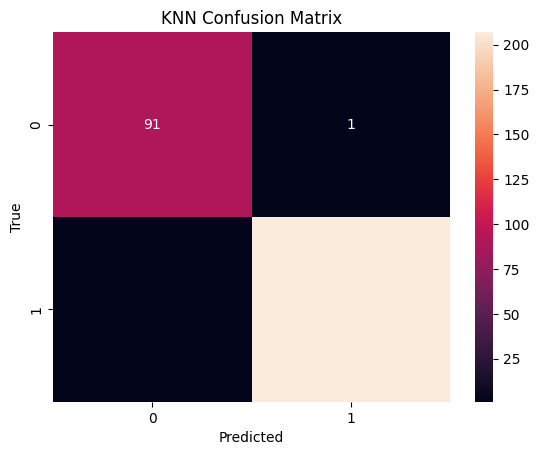

In [110]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [111]:
# Permutation Feature Importance for KNN
perm_importance = permutation_importance(knn_best, X_test, y_test, n_repeats=10)
sorted_idx = perm_importance.importances_mean.argsort()

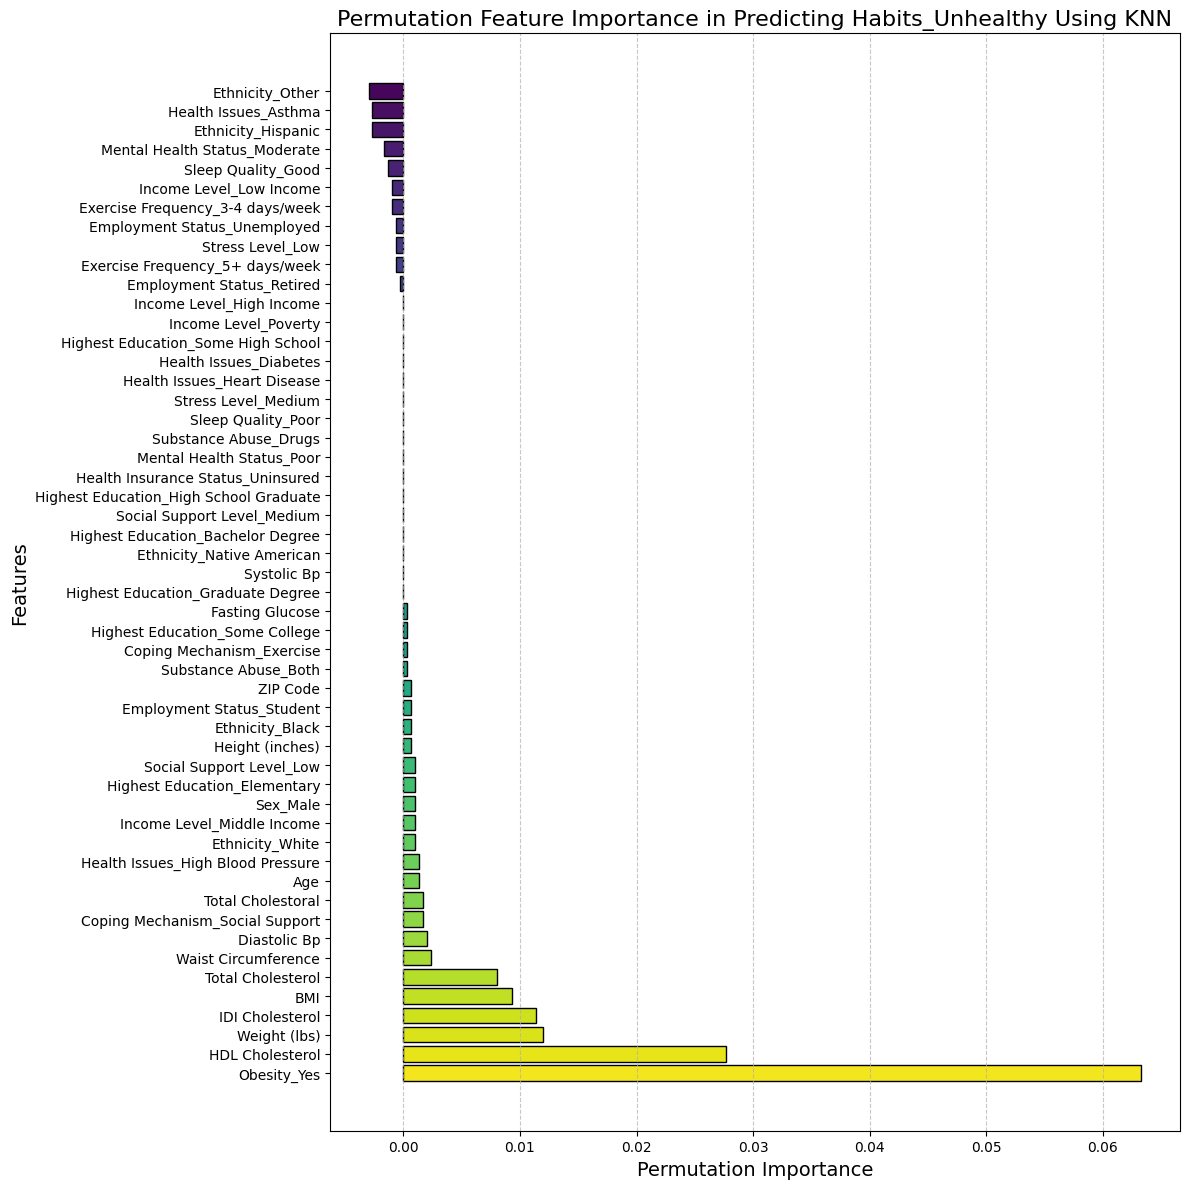

In [112]:
# Let's plot the permutation feature importance for predicting obesity using KNN with improved aesthetics

# Define the color palette to use
colors = sns.color_palette('viridis', len(X.columns))

# Sort the features by their importance
sorted_features = np.array(X.columns)[sorted_idx]
sorted_importances = perm_importance.importances_mean[sorted_idx]

# Setting a larger figure size for better readability and visualization
plt.figure(figsize=(12, 12))

# Creating the horizontal bar plot with a color palette
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black')

# Adding labels and title with larger font sizes for clarity
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Permutation Feature Importance in Predicting Habits_Unhealthy Using KNN", fontsize=16)

# Adding a grid for better readability of the importance scores
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Inverting y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

# Adjusting the layout to prevent clipping of labels and title
plt.tight_layout()

# Display the improved plot
plt.show()




C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

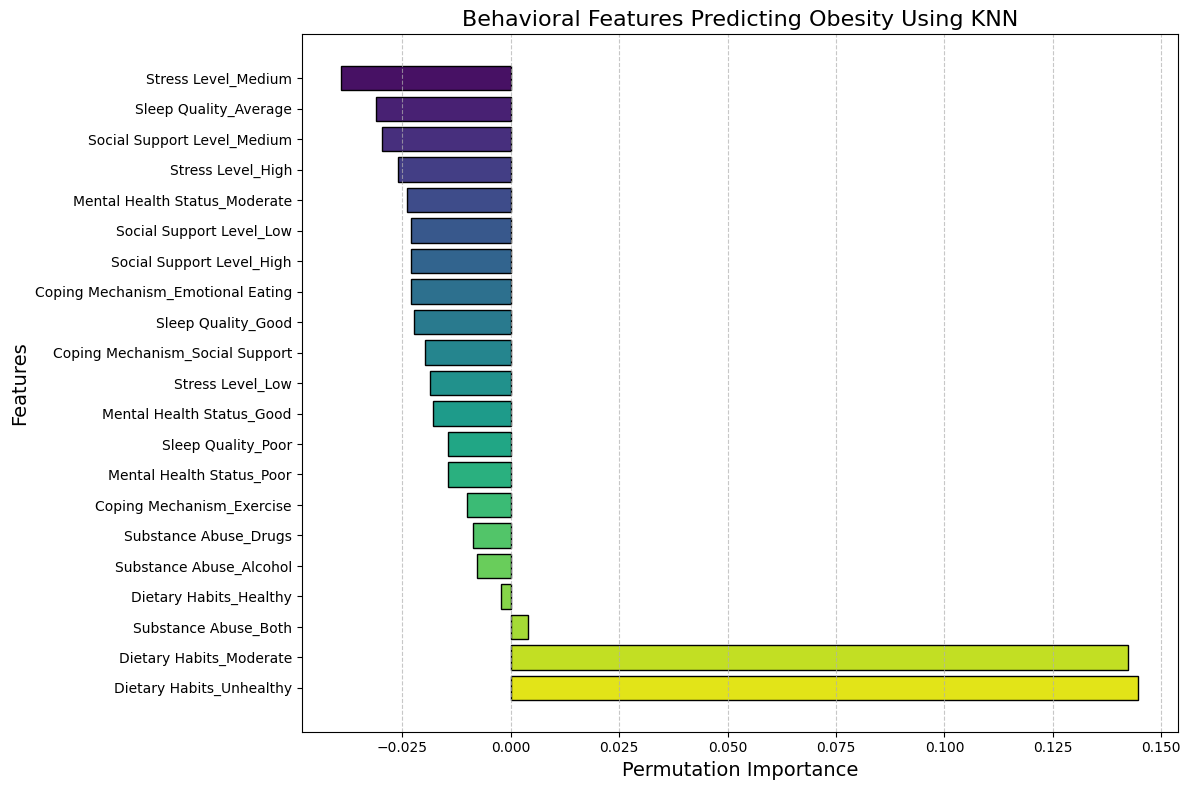

In [113]:
# Load the dataset
data = pd.read_csv('South_Texas_Obesity_Rates.csv')


# Selecting only the specified features and target
selected_features = ['Dietary Habits', 'Stress Level', 'Sleep Quality', 'Substance Abuse', 
                     'Mental Health Status', 'Coping Mechanism', 'Social Support Level', 'Obesity']
data_selected = data[selected_features]

# Convert categorical variables to dummy variables (One-hot encoding)
data_selected = pd.get_dummies(data_selected, columns=['Dietary Habits', 'Stress Level', 'Sleep Quality', 'Substance Abuse', 
                                                      'Mental Health Status', 'Coping Mechanism', 'Social Support Level'])

# One-hot encoding for the target variable 'Obesity'
target_encoder = OneHotEncoder()
y = target_encoder.fit_transform(data_selected[['Obesity']]).toarray()

# Dropping the target variable 'Obesity' from features
X = data_selected.drop('Obesity', axis=1)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)

# Permutation Feature Importance for KNN
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Plotting the permutation feature importances


# Define the color palette to use
colors = sns.color_palette('viridis', len(X.columns))

# Sort the features by their importance
sorted_features = np.array(X.columns)[sorted_idx]
sorted_importances = perm_importance.importances_mean[sorted_idx]

# Setting a larger figure size for better readability and visualization
plt.figure(figsize=(12, 8))

# Creating the horizontal bar plot with a color palette
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black')

# Adding labels and title with larger font sizes for clarity
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Behavioral Features Predicting Obesity Using KNN", fontsize=16)

# Adding a grid for better readability of the importance scores
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Inverting y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

# Adjusting the layout to prevent clipping of labels and title
plt.tight_layout()

# Display the improved plot
plt.show()



C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

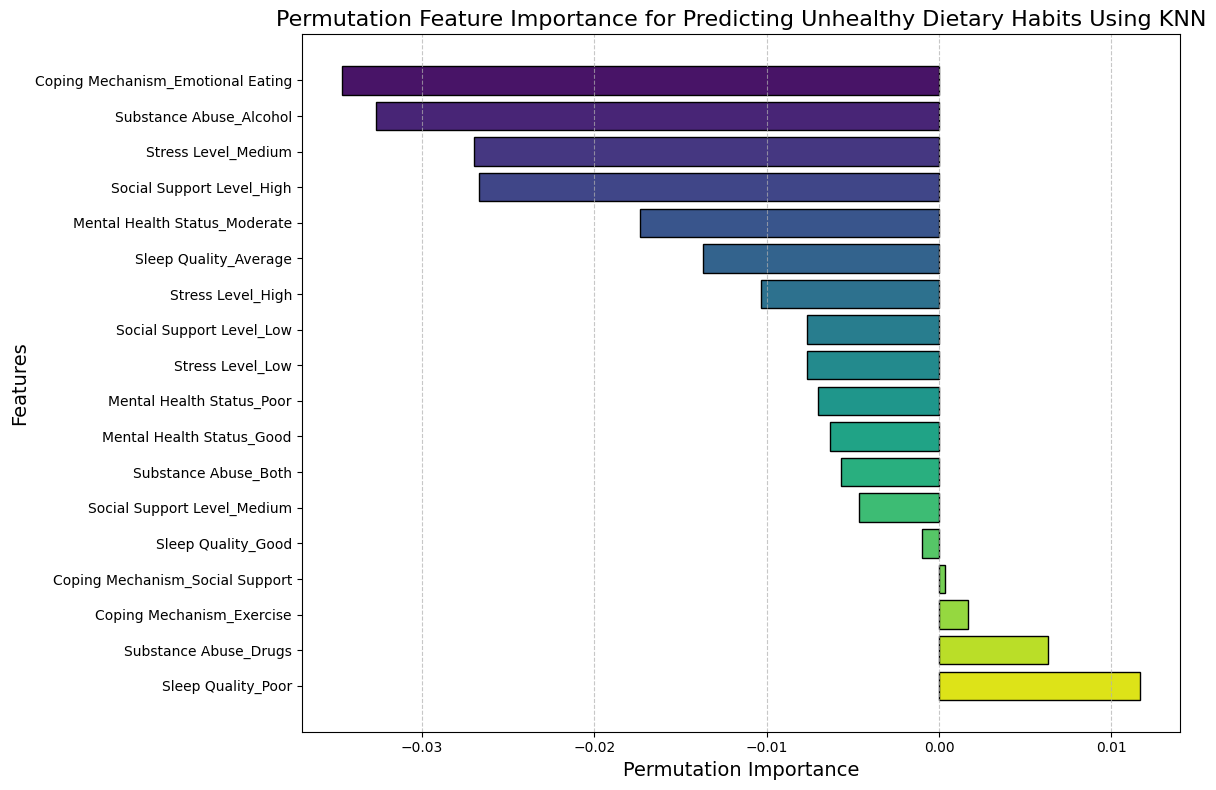

In [123]:
# Corrected code

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming the file is in the current directory, we use the correct path to load the dataset
data = pd.read_csv('South_Texas_Obesity_Rates.csv')

# Selecting only the specified features and target before one-hot encoding
selected_features = [
    'Stress Level', 'Sleep Quality', 'Substance Abuse', 
    'Mental Health Status', 'Coping Mechanism', 'Social Support Level', 'Dietary Habits'
]
data_selected = data[selected_features]

# Convert categorical variables to dummy variables (One-hot encoding)
data_with_dummies = pd.get_dummies(data_selected, columns=[
    'Stress Level', 'Sleep Quality', 'Substance Abuse', 
    'Mental Health Status', 'Coping Mechanism', 'Social Support Level'
])

# Encode the target variable 'Dietary Habits_Unhealthy'
label_encoder = LabelEncoder()
data_with_dummies['Dietary Habits_Unhealthy'] = label_encoder.fit_transform(
    data_with_dummies['Dietary Habits'].apply(lambda x: 1 if x == 'Unhealthy' else 0)
)

# Drop the original 'Dietary Habits' column as it's now encoded in the target
X = data_with_dummies.drop(['Dietary Habits', 'Dietary Habits_Unhealthy'], axis=1)
y = data_with_dummies['Dietary Habits_Unhealthy']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Permutation Feature Importance for KNN
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Define the color palette to use
colors = sns.color_palette('viridis', len(X.columns))

# Sort the features by their importance
sorted_features = np.array(X.columns)[sorted_idx]
sorted_importances = perm_importance.importances_mean[sorted_idx]

# Setting a larger figure size for better readability and visualization
plt.figure(figsize=(12, 8))

# Creating the horizontal bar plot with a color palette
plt.barh(sorted_features, sorted_importances, color=colors, edgecolor='black')

# Adding labels and title with larger font sizes for clarity
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Permutation Feature Importance for Predicting Unhealthy Dietary Habits Using KNN", fontsize=16)

# Adding a grid for better readability of the importance scores
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Inverting y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

# Adjusting the layout to prevent clipping of labels and title
plt.tight_layout()

# Display the improved plot
plt.show()


In [93]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("RFT Model Accuracy:", accuracy_score(y_test, y_pred_nb))
print("RFT Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

RFT Model Accuracy: 0.9933333333333333
RFT Confusion Matrix:
 [[ 92   0]
 [  2 206]]


In [94]:
# Get feature importances and sort them
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

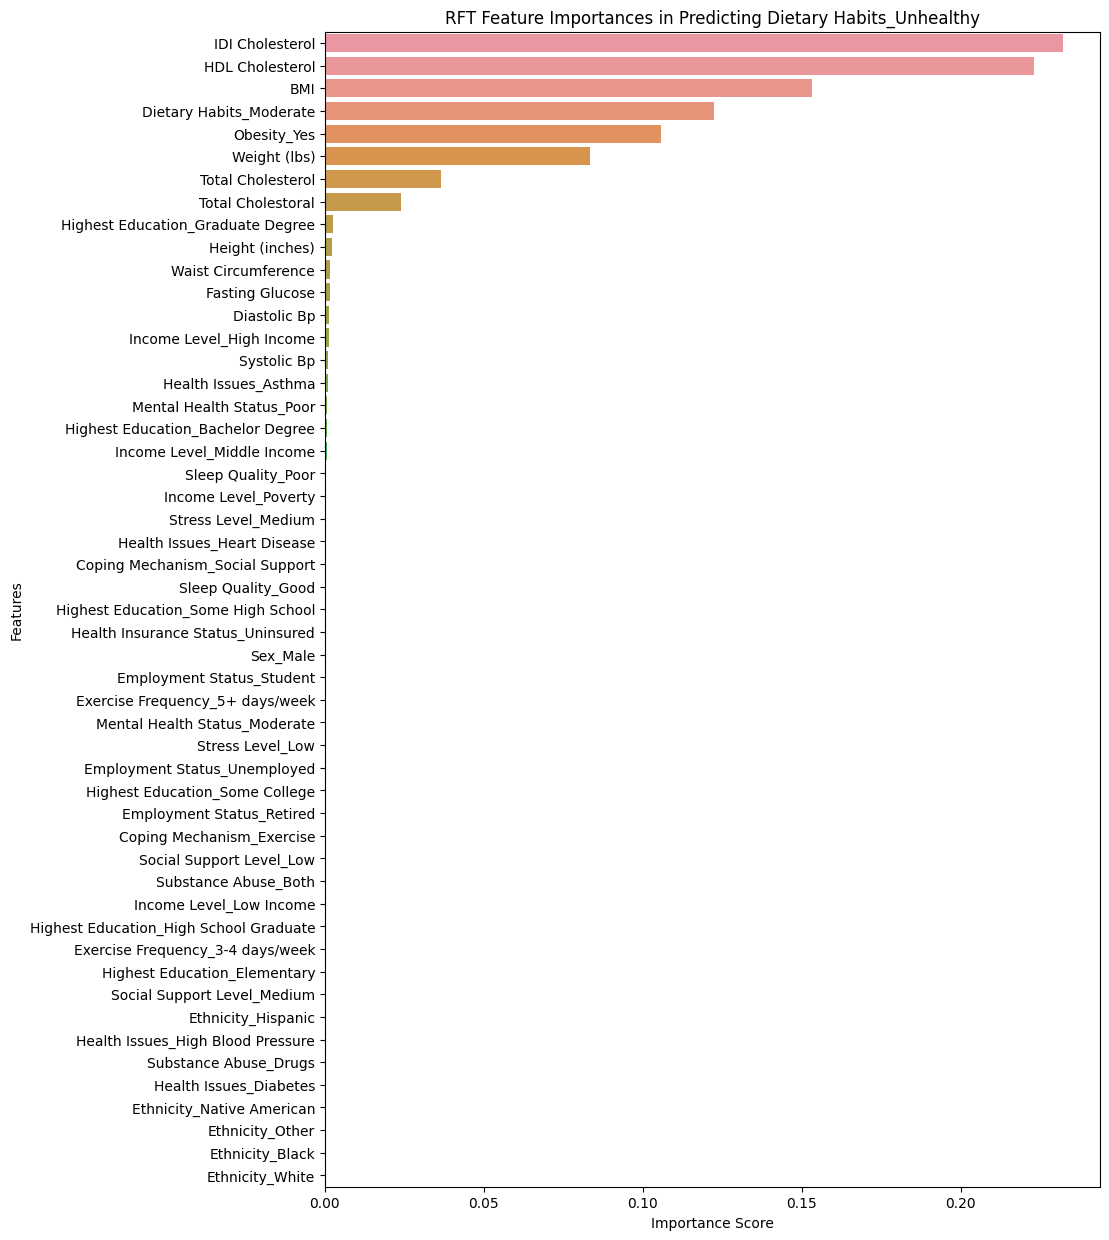

In [95]:
# Plot the feature importances
plt.figure(figsize=(10, 15))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('RFT Feature Importances in Predicting Dietary Habits_Unhealthy')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [96]:
data

,Sex,Weight (lbs),Height (inches),BMI,Obesity,Ethnicity,Highest Education,Employment Status,Income Level,Health Insurance Status,...,IDI Cholesterol,Fasting Glucose,Waist Circumference,Stress Level,Sleep Quality,Substance Abuse,Mental Health Status,Coping Mechanism,Social Support Level,Total Cholesterol
0,Female,325.37,71,45.4,Yes,Hispanic,Elementary,Employed,Poverty,Uninsured,...,193.76,83.83,38.77,High,Poor,NaN,Moderate,Emotional Eating,Medium,227.689291
1,Male,300.83,65,50.1,Yes,Hispanic,Elementary,Unemployed,Below Poverty,Insured,...,165.34,117.79,43.15,High,Good,NaN,Poor,NaN,Low,217.277931
2,Male,237.58,64,40.8,Yes,Hispanic,NaN,Unemployed,Below Poverty,Uninsured,...,189.89,111.74,33.89,Low,Average,NaN,Moderate,Exercise,Medium,213.127129
3,Male,287.12,69,42.4,Yes,Hispanic,Some High School,Employed,Low Income,Uninsured,...,180.99,90.67,43.48,Medium,Average,Both,Moderate,Social Support,Low,236.602890
4,Female,200.73,65,33.4,Yes,Hispanic,Some College,Unemployed,Low Income,Insured,...,188.50,98.25,38.47,High,Poor,Alcohol,Poor,Emotional Eating,High,201.156646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,184.59,69,27.3,No,White,Bachelor Degree,Employed,High Income,Insured,...,151.75,111.78,45.22,High,Average,Alcohol,Moderate,Emotional Eating,Medium,184.228995
996,Male,203.61,69,30.1,Yes,Hispanic,Some College,Unemployed,Poverty,Uninsured,...,197.05,92.31,42.35,Low,Average,NaN,Poor,Emotional Eating,Medium,196.869367
997,Male,145.20,63,25.7,No,Hispanic,Elementary,Student,Low Income,Insured,...,125.75,85.88,48.51,Low,Good,NaN,Moderate,Exercise,Low,199.440686
998,Male,312.79,67,49.0,Yes,Hispanic,Some High School,Retired,Below Poverty,Uninsured,...,193.72,92.28,49.03,Low,Average,Alcohol,Moderate,NaN,High,223.286045


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


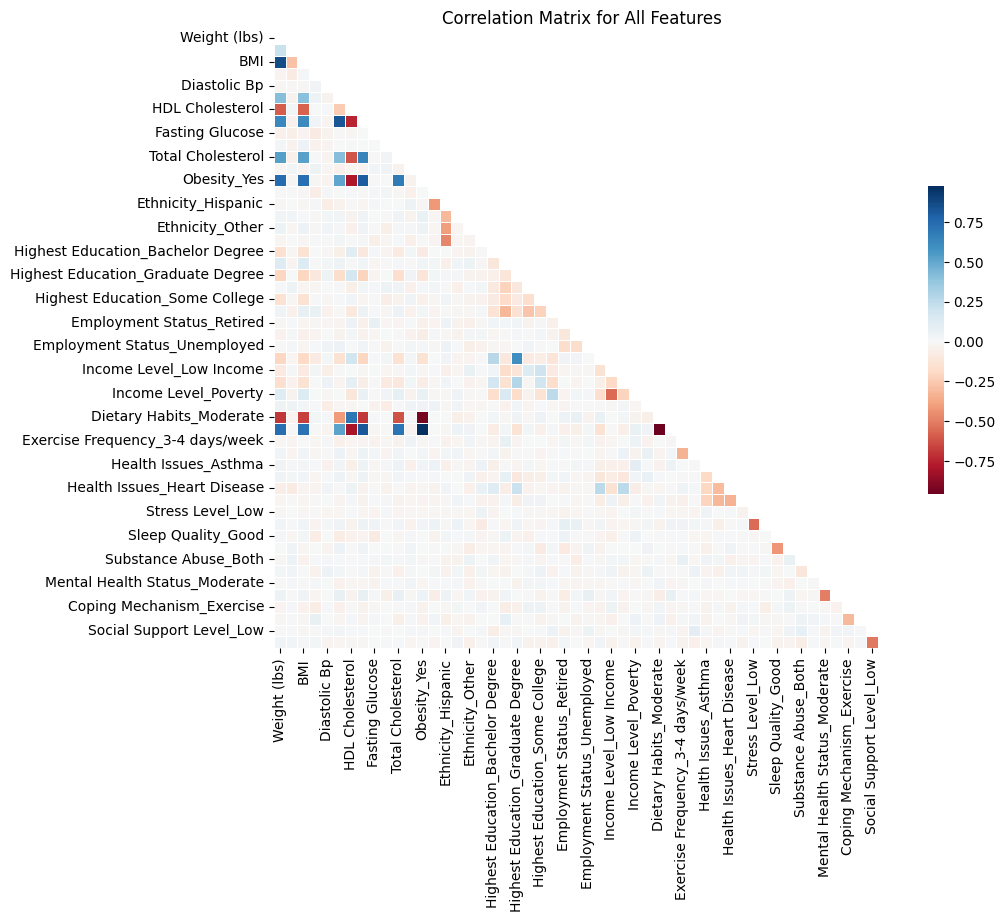

In [99]:
correlation_matrix = data_with_dummies.corr()

# Generate a mask for the upper triangle

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='RdBu', center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix for All Features')
plt.show()

In [100]:
correlation_matrix

,Weight (lbs),Height (inches),BMI,Systolic Bp,Diastolic Bp,Total Cholestoral,HDL Cholesterol,IDI Cholesterol,Fasting Glucose,Waist Circumference,...,Sleep Quality_Good,Sleep Quality_Poor,Substance Abuse_Both,Substance Abuse_Drugs,Mental Health Status_Moderate,Mental Health Status_Poor,Coping Mechanism_Exercise,Coping Mechanism_Social Support,Social Support Level_Low,Social Support Level_Medium
Weight (lbs),1.000000,0.217211,0.868795,-0.021421,-0.018958,0.411016,-0.589626,0.623982,-0.046044,0.030530,...,0.023724,0.005066,-0.009895,0.025864,-0.000005,0.052792,-0.025364,-0.011612,-0.001591,0.034521
Height (inches),0.217211,1.000000,-0.280924,-0.080525,-0.007023,-0.034520,0.024680,-0.038018,-0.058083,-0.040962,...,-0.019786,0.039923,0.061328,0.035495,0.020301,-0.006025,0.020312,0.013985,0.012344,0.033375
BMI,0.868795,-0.280924,1.000000,0.023190,-0.009459,0.408954,-0.579959,0.616964,-0.022341,0.054779,...,0.030290,-0.012696,-0.042431,0.005283,-0.002939,0.043475,-0.037338,-0.012805,-0.012143,0.017740
Systolic Bp,-0.021421,-0.080525,0.023190,1.000000,0.038090,0.052967,0.006053,0.032904,-0.075349,-0.041024,...,-0.069326,0.001822,0.009688,-0.038830,0.018751,-0.018374,-0.070613,0.076583,-0.003631,0.029822
Diastolic Bp,-0.018958,-0.007023,-0.009459,0.038090,1.000000,-0.031601,0.011637,-0.028461,-0.034082,-0.021763,...,0.006840,-0.022833,0.019825,0.055628,0.005535,0.008154,0.011045,0.005425,0.018158,-0.023581
Total Cholestoral,0.411016,-0.034520,0.408954,0.052967,-0.031601,1.000000,-0.241331,0.827182,-0.003623,0.006377,...,-0.068340,0.054767,0.016376,0.026776,-0.039531,0.076824,-0.048486,-0.021092,0.024699,-0.018701
HDL Cholesterol,-0.589626,0.024680,-0.579959,0.006053,0.011637,-0.241331,1.000000,-0.744950,-0.007853,-0.003792,...,-0.041233,-0.003451,0.000664,-0.004651,-0.010837,-0.033201,-0.001971,0.021093,0.012264,-0.006470
IDI Cholesterol,0.623982,-0.038018,0.616964,0.032904,-0.028461,0.827182,-0.744950,1.000000,0.002055,0.006589,...,-0.023106,0.039648,0.010875,0.021092,-0.020910,0.072038,-0.032179,-0.026709,0.009881,-0.009111
Fasting Glucose,-0.046044,-0.058083,-0.022341,-0.075349,-0.034082,-0.003623,-0.007853,0.002055,1.000000,0.002120,...,-0.080105,0.001790,0.021266,-0.032278,-0.031320,0.018955,-0.009298,0.017319,0.005918,0.003842
Waist Circumference,0.030530,-0.040962,0.054779,-0.041024,-0.021763,0.006377,-0.003792,0.006589,0.002120,1.000000,...,0.001773,0.003092,0.024013,-0.002118,0.012450,-0.053857,0.008358,0.008464,-0.004014,0.011955


In [101]:
# Load the dataset
data = pd.read_csv('South_Texas_Obesity_Rates.csv', sep=',')

# Dropping unnecessary columns
data = data.drop(['Patient ID', 'ZIP Code','Date of Birth','Age'], axis=1)

data_with_dummies = pd.get_dummies(data, drop_first=True)

In [102]:
for col in data_with_dummies.columns:
    print(col)

Weight (lbs)
Height (inches)
BMI
Systolic Bp
Diastolic Bp
Total Cholestoral
HDL Cholesterol
IDI Cholesterol
Fasting Glucose
Waist Circumference
Total Cholesterol
Sex_Male
Obesity_Yes
Ethnicity_Black
Ethnicity_Hispanic
Ethnicity_Native American
Ethnicity_Other
Ethnicity_White
Highest Education_Bachelor Degree
Highest Education_Elementary
Highest Education_Graduate Degree
Highest Education_High School Graduate
Highest Education_Some College
Highest Education_Some High School
Employment Status_Retired
Employment Status_Student
Employment Status_Unemployed
Income Level_High Income
Income Level_Low Income
Income Level_Middle Income
Income Level_Poverty
Health Insurance Status_Uninsured
Dietary Habits_Moderate
Dietary Habits_Unhealthy
Exercise Frequency_3-4 days/week
Exercise Frequency_5+ days/week
Health Issues_Asthma
Health Issues_Diabetes
Health Issues_Heart Disease
Health Issues_High Blood Pressure
Stress Level_Low
Stress Level_Medium
Sleep Quality_Good
Sleep Quality_Poor
Substance Abuse

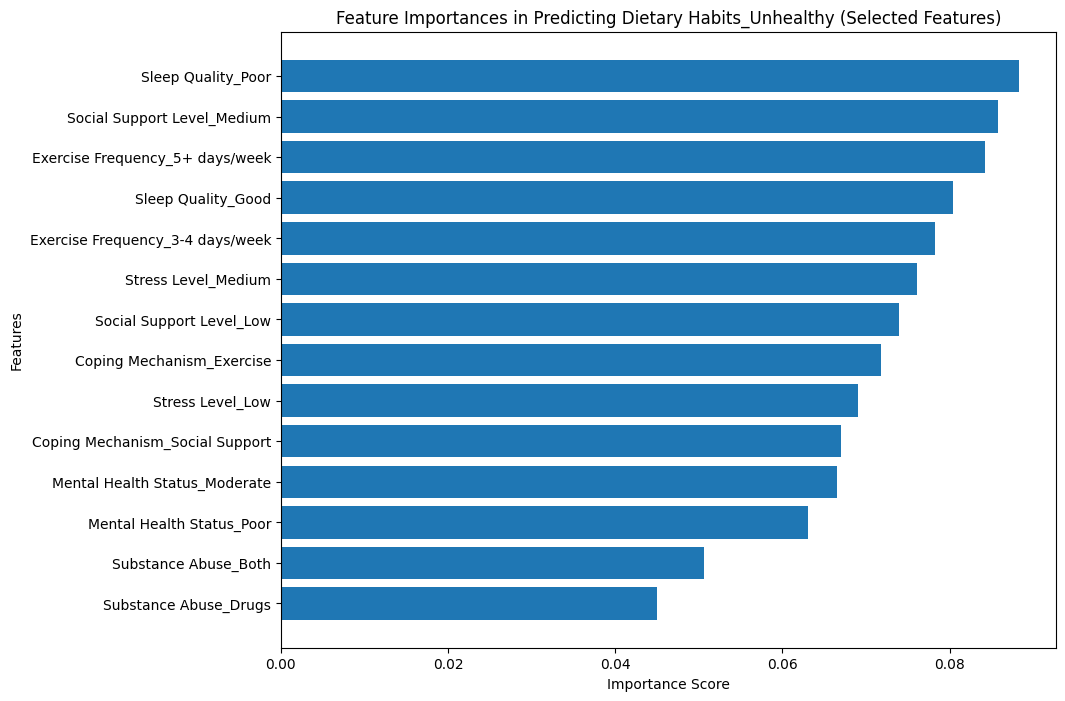

In [103]:




selected_features = ['Stress Level_Low','Stress Level_Medium', 'Sleep Quality_Good','Sleep Quality_Poor', 'Substance Abuse_Both',
                     'Substance Abuse_Drugs',
                     'Mental Health Status_Moderate','Mental Health Status_Poor', 'Coping Mechanism_Exercise','Coping Mechanism_Social Support',
                     'Social Support Level_Low','Social Support Level_Medium','Exercise Frequency_3-4 days/week','Exercise Frequency_5+ days/week']
X = data_with_dummies[selected_features]
y = data_with_dummies['Dietary Habits_Unhealthy']  # This assumes 'Obesity' is already encoded as a numeric variable.



# Now, perform one-hot encoding on the X features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances and sort them
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.title('Feature Importances in Predicting Dietary Habits_Unhealthy (Selected Features)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()
